<a href="https://colab.research.google.com/github/stymgupta/playstore/blob/main/playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the Datset**

In [ ]:
playstore_df = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Number of Rows and Columns in Dataset
print(playstore_df.shape)

(10841, 13)


In [ ]:
#Removing Duplicates
playstore = playstore_df.drop_duplicates()
playstore.shape

(10358, 13)

In [ ]:
playstore.columns = playstore.columns.str.replace(' ', '_')

**Cleaning The Dataset**

We have to clear the dataset numerical values which is by default concatenated with some symbols like (",", "+", "$") these are present in numerical values like **['Installs', 'Price']**.

In [ ]:
remove = ['+', ',', '$']
from_col = ['Installs', 'Price']
for i in from_col:
  for j in remove:
    playstore[i] = playstore[i].apply(lambda x: x.replace(j,''))
print(playstore.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last_Updated    10358 non-null  object 
 11  Current_Ver     10350 non-null  object 
 12  Android_Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [ ]:
playstore[playstore.Content_Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Droping that dirty row
playstore.drop([10472], axis=0, inplace=True)

Now we have 4 columns with pure numeric values, so change the data type of those columns to float or int.

In [ ]:
#Changing datatype of installs from object to float
playstore['Installs'] = playstore['Installs'].astype(float)
#Similarly changing datatype of Price to float
playstore['Price'] = playstore['Price'].astype(float)
#Changing datatype of Reviews column from object to int
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'], errors= 'coerce')
print(playstore.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object


In [ ]:
#checking for null values
playstore.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64

In [ ]:
#Dealing with Null Value
playstore[playstore.Type.isnull()][['Type','Price']]

,Type,Price
9148,NaN,0.0


In [ ]:
playstore.Type = playstore.Type.fillna('Free')

**App Categories**

Explore the apps, falling in which categories and showing with graph that which category has largest number of apps and which category contains least number of apps and so on. 

Number of Categories are: 33


Text(0.5, 0, 'Categories')

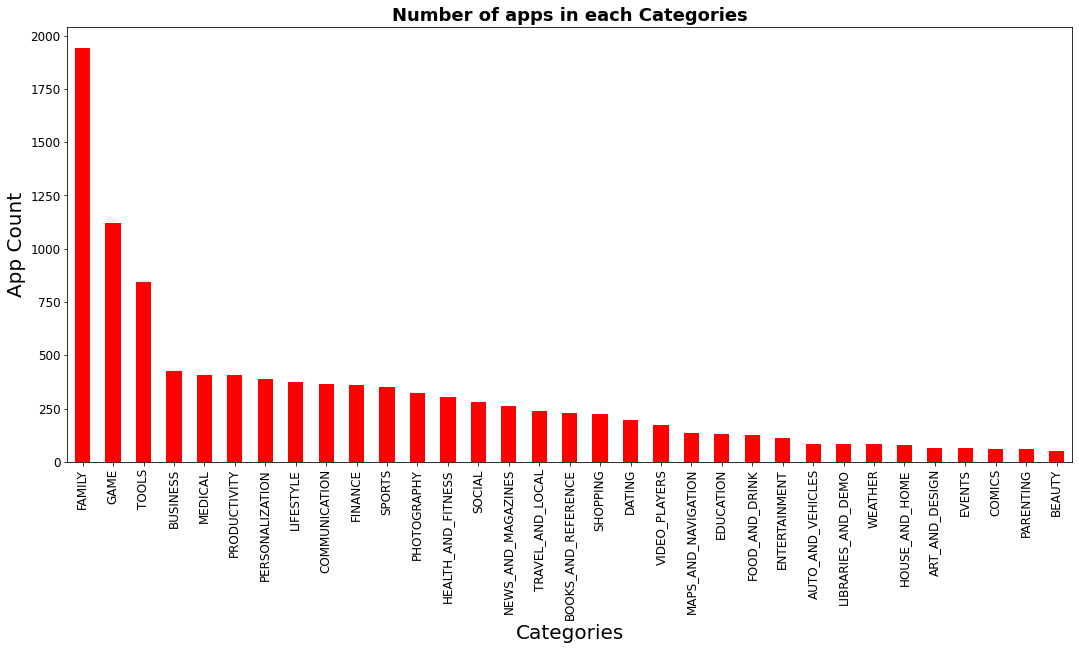

In [ ]:
#print total no. of categories
total_cat = len(playstore['Category'].unique())
print("Number of Categories are:",total_cat)
playstore.Category.value_counts().sort_values(ascending = False).plot(kind ='bar', figsize=(18,8), fontsize=12, color='red')
plt.title("Number of apps in each Categories", fontsize=18,fontweight='bold')
plt.ylabel("App Count", size= 20)
plt.xlabel("Categories", size = 20)

The Graph clearly shows that category **Family** has highest number of apps and **Beauty** section has least number of apps.

**App Ratings**

Ratings are largerly impact app store and app performance as well as company's overall brand image. Here we are showing the overall average of app ratings which is 4.18 that means apps are really so good. Also the histogram shows that most of the apps are highly rated along with low rated apps and the dashed line indicating average of rating.

The average rating of apps: 4.187876743139908


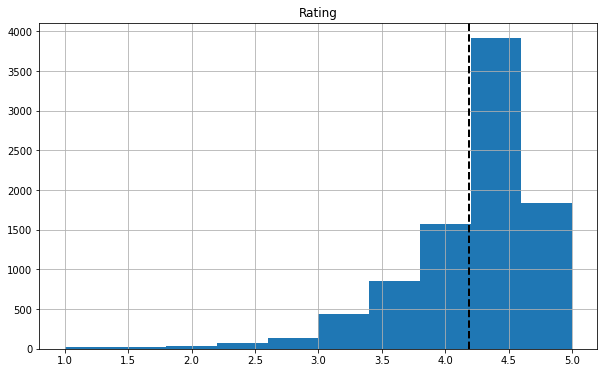

In [ ]:
avg_rating = playstore.Rating.mean()
print("The average rating of apps:",avg_rating)
playstore.hist('Rating', figsize=(10,6));
plt.axvline(avg_rating, linestyle='dashed', linewidth=2, color='black');

**Dealing with another null value i.e. Current_Ver and Android_Ver**

For Categorical Values we use "Mode" function.

In [ ]:
print(playstore['Current_Ver'].mode())
print(playstore['Android_Ver'].mode())

0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
playstore['Current_Ver'].fillna(str(playstore['Current_Ver'].mode().values[0]), inplace=True)
playstore['Android_Ver'].fillna(str(playstore['Android_Ver'].mode().values[0]), inplace=True)

In [ ]:
playstore.describe()

,Rating,Reviews,Installs,Price
count,8892.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,1.415776e+07,1.030800
std,0.522377,2.696778e+06,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


**Data Visualization**

First take all the category and relate with respect to other numerical columns like Reviews, Installs, Price and Rating.

In [ ]:
group = playstore.groupby('Category')
a = group['Reviews'].agg(np.mean)
b = group['Installs'].agg(np.mean)
c = group['Price'].agg(np.sum)
d = group['Rating'].agg(np.mean)
print(a)
print(b)
print(c)
print(d)

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.510099e+04
BUSINESS               2.894185e+04
COMICS                 5.638793e+04
COMMUNICATION          1.642824e+06
DATING                 2.829284e+04
EDUCATION              1.781962e+05
ENTERTAINMENT          4.285650e+05
EVENTS                 2.515906e+03
FAMILY                 2.042059e+05
FINANCE                4.722192e+04
FOOD_AND_DRINK         6.186755e+04
GAME                   1.262745e+06
HEALTH_AND_FITNESS     1.008013e+05
HOUSE_AND_HOME         3.493465e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.437151e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.423424e+03
NEWS_AND_MAGAZINES     1.448707e+05
PARENTING              1.597218e+04
PERSONALIZATION        1.937968e+05
PHOTOGRAPHY            6.344640e+05
PRODUCTIVITY           2.519767e+05
SHOPPING               4.237998e+05
SOCIAL             

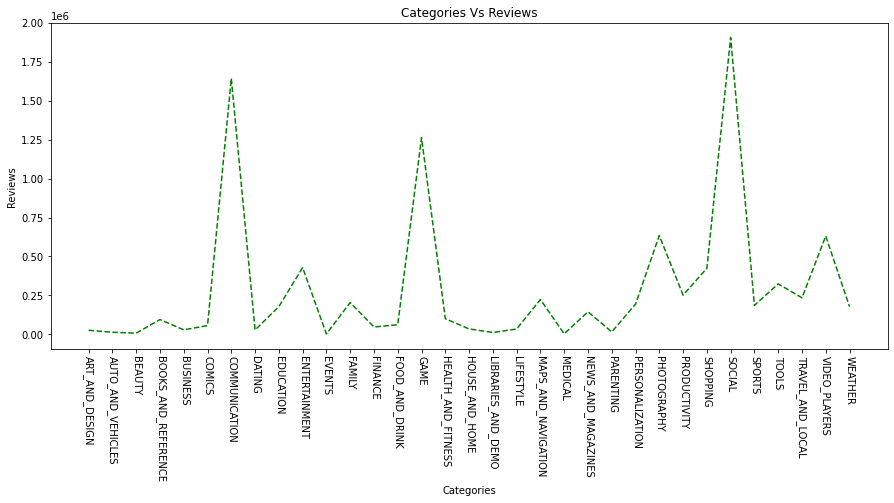

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a, "r--", color='green')
plt.xticks(rotation=270)
plt.title('Categories Vs Reviews')
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()

**Now check the top app which has maximum Reviews**

In [ ]:
playstore[playstore['Reviews'].max()==playstore['Reviews']][['App', 'Reviews']]

,App,Reviews
2544,Facebook,78158306


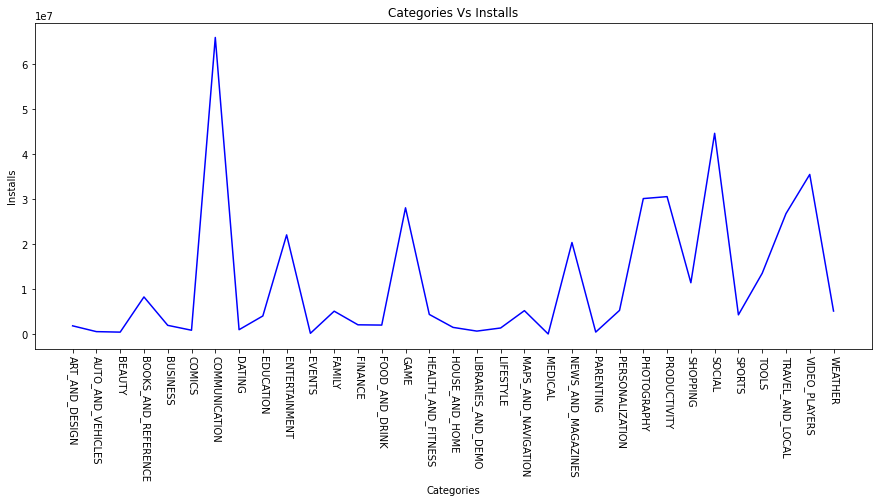

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(b, color='blue')
plt.xticks(rotation=270)
plt.title('Categories Vs Installs')
plt.xlabel("Categories")
plt.ylabel("Installs")
plt.show()

**Most Installed app vs User Ratings**

Here we extract data of apps which are most downloaded apps on playstore.
Afterthat, showing which apps have highest and lowest ratings among them.
The histogram shows number of apps which has how many ratings among these.
Like, the histogram shows there are 12  most installed apps which are getting higest rating among these which is 4.5 & 1 app which has least rating i.e. 3.8

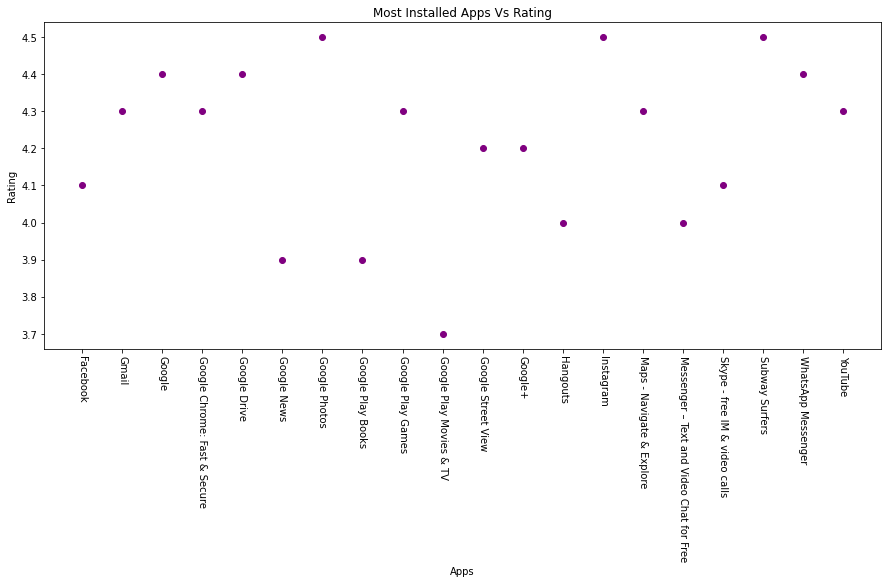

Total Number of most installed apps: 49


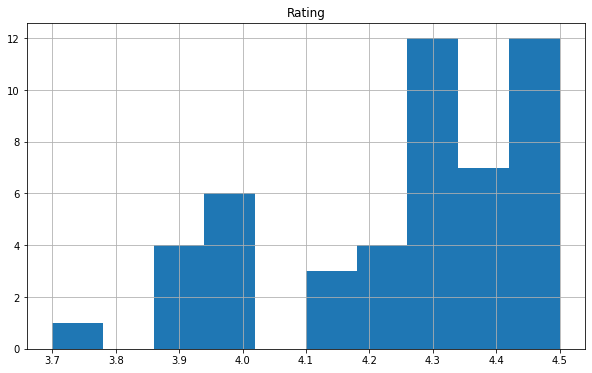

In [ ]:
#Check which app is most installed
most_install = playstore[playstore['Installs'].max()==playstore['Installs']][['App', 'Rating']]
grp = most_install.groupby('App')['Rating'].agg(np.mean)
plt.figure(figsize=(15,6))
plt.plot(grp, 'ro', color='purple')
plt.xticks(rotation=270)
plt.title('Most Installed Apps Vs Rating')
plt.xlabel("Apps")
plt.ylabel("Rating")
plt.show()
most_install.hist('Rating', figsize=(10,6))
print('Total Number of most installed apps:',len(most_install))

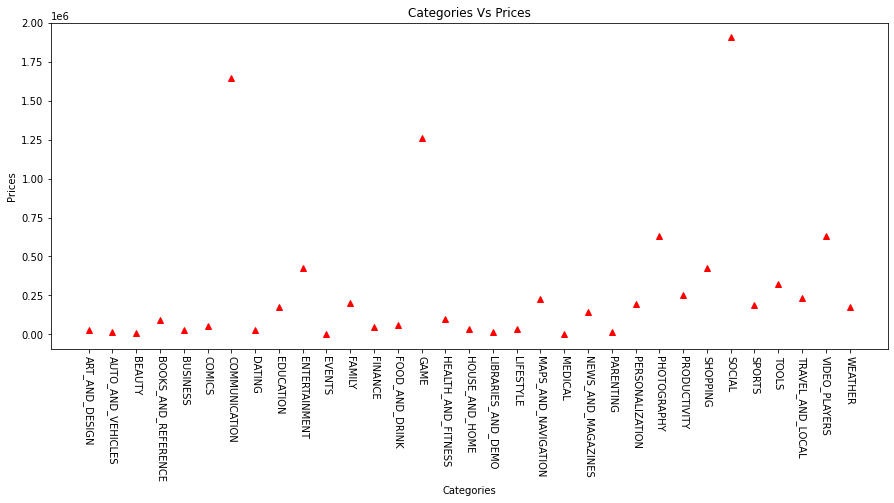

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(a, "g^", color='red')
plt.xticks(rotation=270)
plt.title('Categories Vs Prices')
plt.xlabel("Categories")
plt.ylabel("Prices")
plt.show()

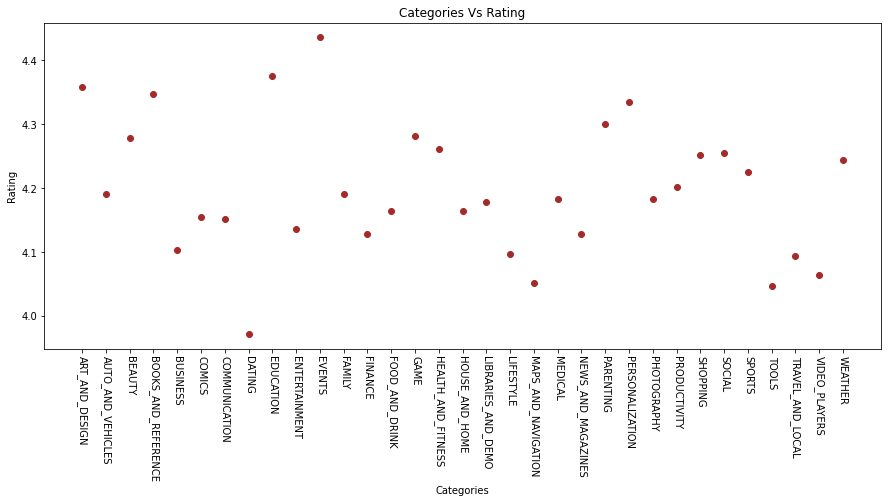

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(d, "ro", color='brown')
plt.xticks(rotation=270)
plt.title('Categories Vs Rating')
plt.xlabel("Categories")
plt.ylabel("Rating")
plt.show()

**Information about 5 Star Apps**

Total Number of Apps having 5 star Rating: 271


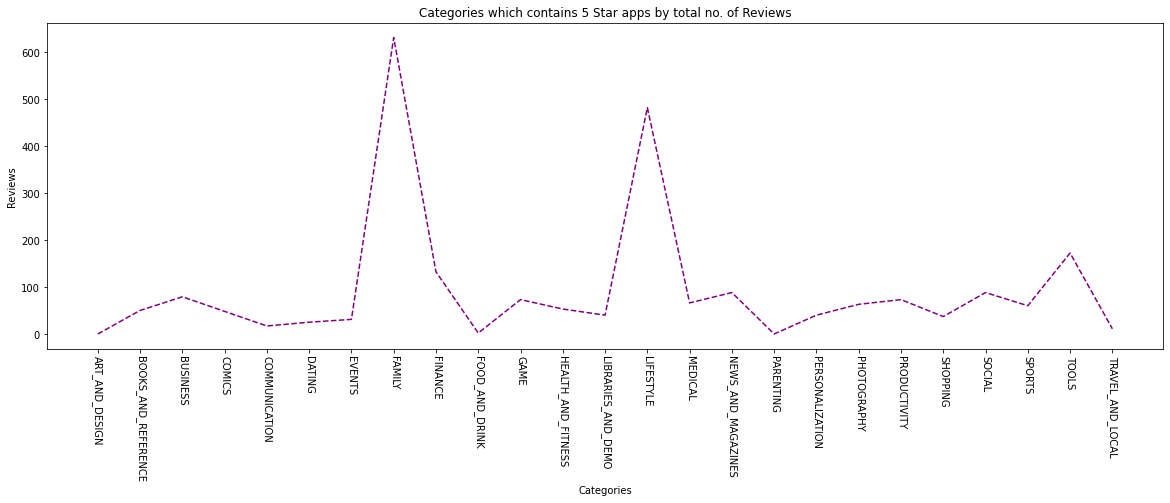

In [ ]:
#Check how many apps have 5 stars rating
print('Total Number of Apps having 5 star Rating:',len(playstore[playstore['Rating'].max()==playstore['Rating']]))
Reviewed_popular = (playstore[playstore['Rating'].max()==playstore['Rating']])[['App','Category', 'Reviews']]
gr = Reviewed_popular.groupby('Category')['Reviews'].agg(np.sum)
plt.figure(figsize=(20,6))
plt.plot(gr, 'r--', color='purple')
plt.xticks(rotation=270)
plt.title('Categories which contains 5 Star apps by total no. of Reviews')
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()

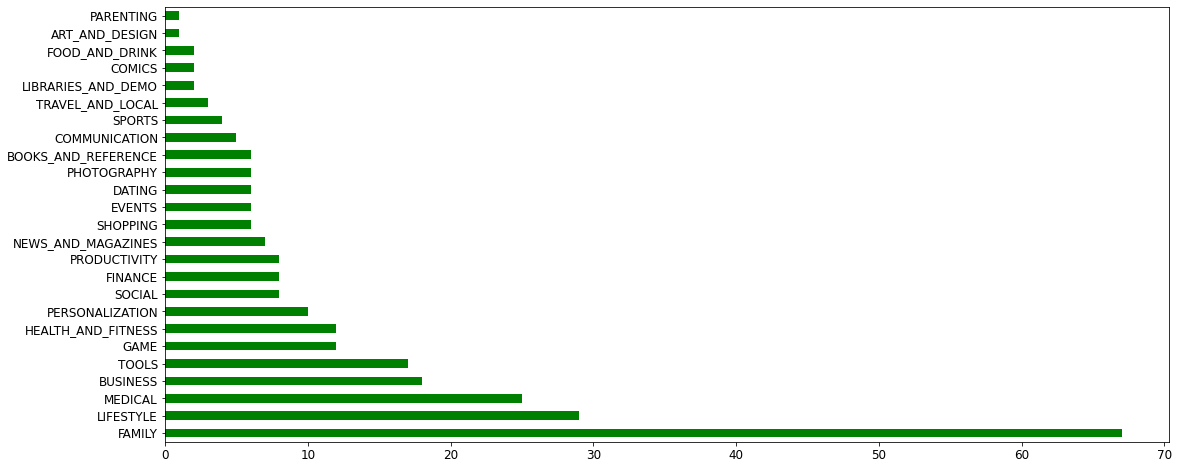

In [ ]:
#Shows which category have how number of apps getting 5 star
Reviewed_popular.Category.value_counts().sort_values(ascending = False).plot(kind ='barh', figsize=(18,8), fontsize=12, color='green');

**Representation of Apps(Paid Vs Free)**

That clarifies, most of the user go for free apps thats why there are humourous free apps available of play store, also the free apps enhance the growth of developer cause these apps has larger users than paid.
Free apps are more popular, it has advantages like,

*   User get it easily cause there is no charge.
*   Developer can also get revenue from it, by giving advertisements to the app.





Type
Free    4.182425
Paid    4.261501
Name: Rating, dtype: float64

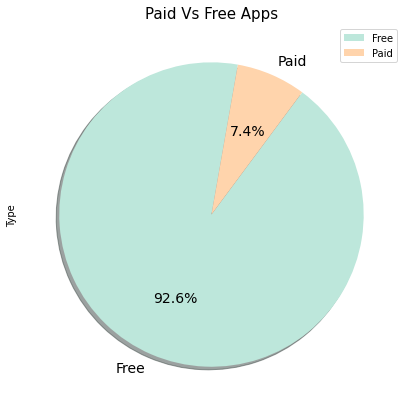

In [ ]:
playstore['Type'].value_counts().plot(kind = 'pie', fontsize=14, autopct='%3.1f%%', figsize=(12,7), shadow=True, startangle=80, legend=True, cmap='icefire')
plt.title('Paid Vs Free Apps', fontsize=15);
#Average Rating of Free and Paid Apps
playstore.groupby('Type')['Rating'].mean()

In [ ]:
import plotly
import plotly.graph_objs as go
paid_box = go.Box(
    # Data for paid apps
    y = playstore[playstore['Type'] == 'Paid' ]['Installs'],
    name = 'Paid'
)

free_box = go.Box(
    # Data for free apps
    y = playstore[playstore['Type'] == 'Free' ]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [paid_box, free_box]
plotly.offline.iplot({'data': data, 'layout': layout})

**Relationship between App Price and Categories**

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


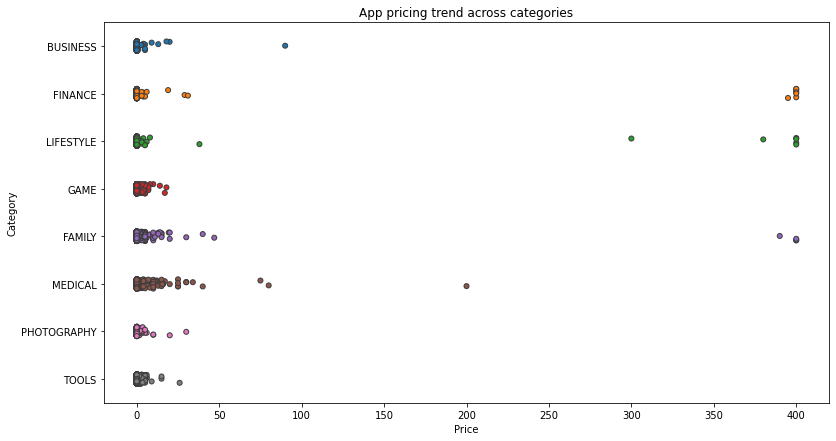

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# Select a few popular app categories
popular_app_cats = playstore[playstore.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

**Correlation**

In [ ]:
playstore.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068732,0.050886,-0.022355
Reviews,0.068732,1.000000,0.634997,-0.009417
Installs,0.050886,0.634997,1.000000,-0.011147
Price,-0.022355,-0.009417,-0.011147,1.000000


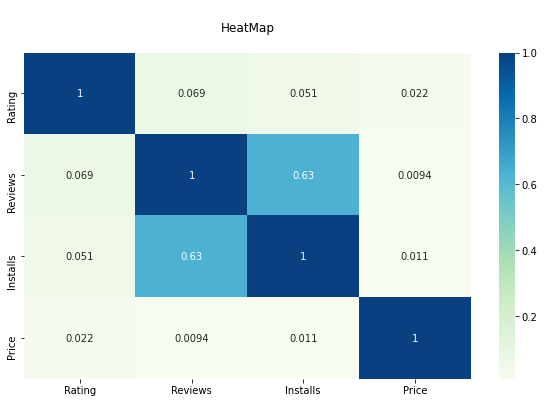

In [ ]:
#Constructing Heatmap to understanding Correlation
plt.figure(figsize= (10,6))
plt.title("\nHeatMap\n")
sns.heatmap(abs(playstore.corr()), cmap='GnBu', annot=True);

**Paid apps price vs their Ratings**

The average price of paid apps are 13.96, The range of most of the pair apps are between 0 to 50 dollers. Some of the apps are highly expensive.

Since in increasing the price, Rating diminsed and less than 4.
Thus, it can be concluded that their is weak negative correlation between Rating and Price.

The average price of apps: 13.955555555555408


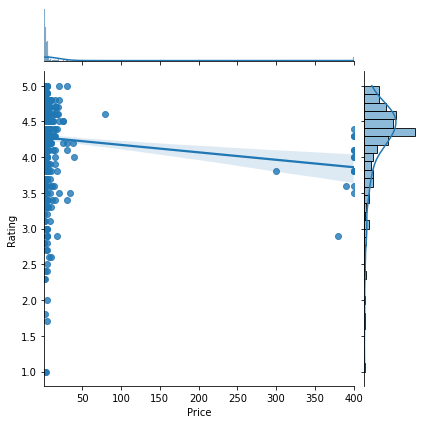

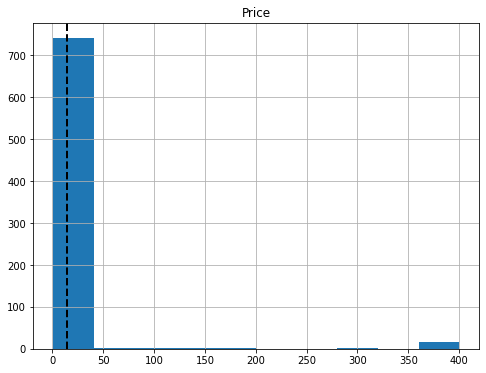

In [ ]:
paid_apps = playstore[playstore['Type']=='Paid']
sns.jointplot(x = paid_apps["Price"], y=paid_apps["Rating"], kind='reg');
avg_price = paid_apps.Price.mean()
print("The average price of apps:",avg_price)
paid_apps.hist('Price', figsize=(8,6));
plt.axvline(avg_price, linestyle='dashed', linewidth=2, color='black');

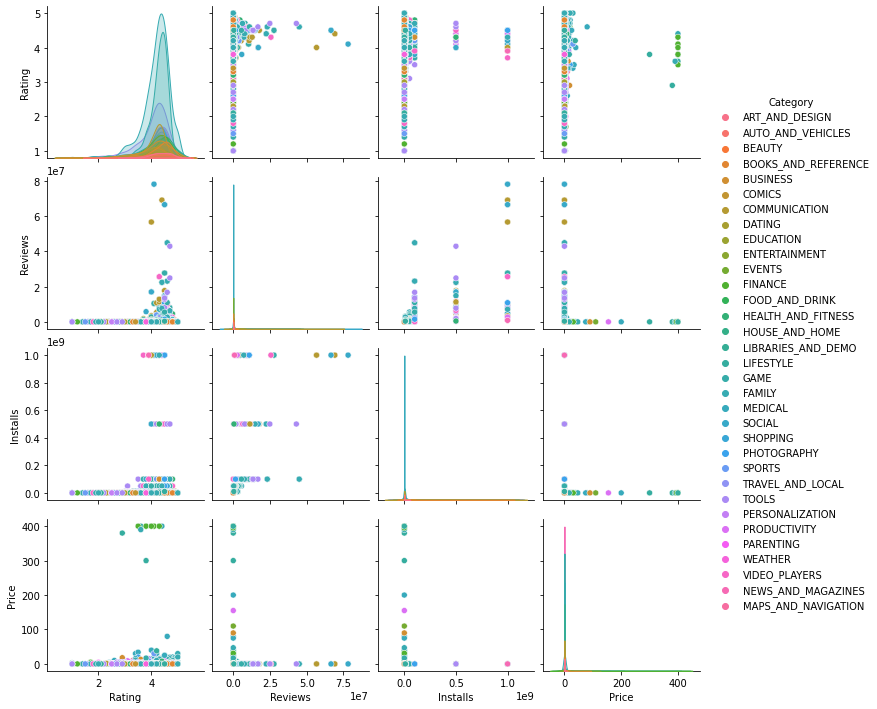

In [ ]:
sns.pairplot(playstore, hue='Category');

**Based on Content Rating**

Most of the apps are made for "Everyone" and some are unrated also.

Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64


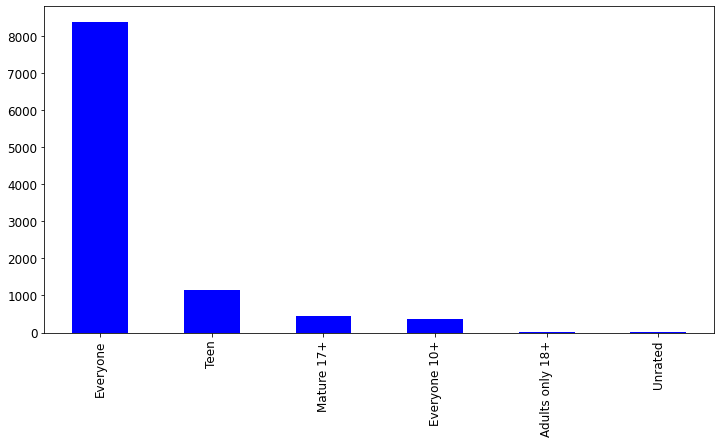

In [ ]:
print(playstore['Content_Rating'].value_counts())
playstore.Content_Rating.value_counts().sort_values(ascending = False).plot(kind ='bar', figsize=(12,6), fontsize=12, color='blue');

Here we chooose median for groupby rating with content_rating, because it measure the central tendency.

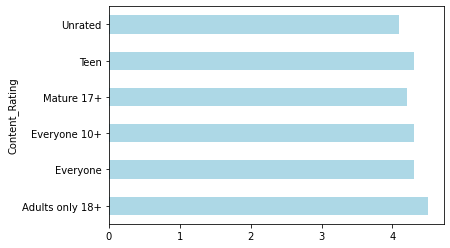

In [ ]:
playstore.groupby(['Content_Rating'])['Rating'].median().plot.barh(color='lightblue')
plt.show()

**Conclusion**



1.   Most reviewed app- Facebook
2.   Most Expensive app- I'm Rich- Trump Edition
3.   Family Category has maximum number of 5 star applications.
4.   Average price of all paid apps are - 13.96
5.   Free Apps are more preferabble download than paid apps.
6.   There are only 7.4% apps are paid, rest are free.
7.   Family category has most apps on the other hand Beauty category has least number of apps.
8.   Average Rating of all apps are 4.19 which is too good.
9.   Maximum numbers of apps are made for everyone.

**Thank You**

